<a href="https://colab.research.google.com/github/beneDesp/GLDM3002/blob/lab1/Lab1_walsh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

In [18]:
from google.colab import files
uploaded = files.upload()

Saving Cereals.csv to Cereals (1).csv


In [19]:
import pandas as pd
#/content/Cereals.csv
cereals_df = pd.read_csv('/content/Cereals.csv')

# Quantitative/Numerical

In [20]:
cereals_df.dtypes

name         object
mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars      float64
potass      float64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

## <u> Subquestions </u>

**a)** ***quantitative/numeric varables:*** calories, protein, fat, sodium, fiber, carbo, sugars, potass, vitamins, weight, cups, rating

**b.)**

***nominal variables:*** name, mfr

***ordinal variables:*** type (ordered by temperature), shelf (although identified as an integer, the integer represents a non-continuous distance from ground)

# Summary Statistics

In [21]:
#type(cereals_df.describe())
#cereals_df.describe()
cols = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'weight', 'cups', 'rating']
print(cereals_df[cols].describe().loc[['mean','50%','min','max','std']])

        calories   protein       fat      sodium      fiber      carbo  \
mean  106.883117  2.545455  1.012987  159.675325   2.151948  14.802632   
50%   110.000000  3.000000  1.000000  180.000000   2.000000  14.500000   
min    50.000000  1.000000  0.000000    0.000000   0.000000   5.000000   
max   160.000000  6.000000  5.000000  320.000000  14.000000  23.000000   
std    19.484119  1.094790  1.006473   83.832295   2.383364   3.907326   

         sugars      potass    vitamins    weight      cups     rating  
mean   7.026316   98.666667   28.246753  1.029610  0.821039  42.665705  
50%    7.000000   90.000000   25.000000  1.000000  0.750000  40.400208  
min    0.000000   15.000000    0.000000  0.500000  0.250000  18.042851  
max   15.000000  330.000000  100.000000  1.500000  1.500000  93.704912  
std    4.378656   70.410636   22.342523  0.150477  0.232716  14.047289  


# Plot Histogram

[[<Axes: title={'center': 'calories'}>
  <Axes: title={'center': 'protein'}> <Axes: title={'center': 'fat'}>]
 [<Axes: title={'center': 'sodium'}> <Axes: title={'center': 'fiber'}>
  <Axes: title={'center': 'carbo'}>]
 [<Axes: title={'center': 'sugars'}> <Axes: title={'center': 'potass'}>
  <Axes: title={'center': 'vitamins'}>]
 [<Axes: title={'center': 'weight'}> <Axes: title={'center': 'cups'}>
  <Axes: title={'center': 'rating'}>]]


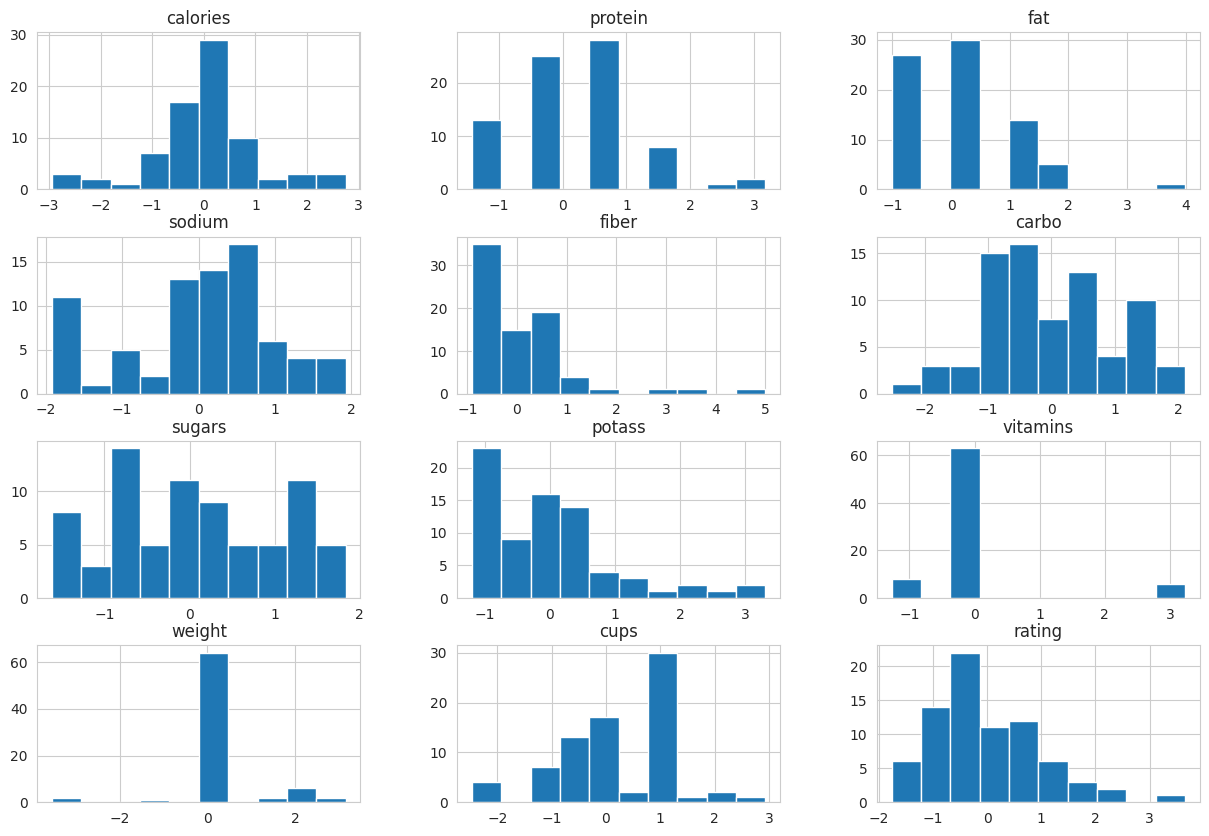

In [22]:
import numpy as np
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
cols = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'weight', 'cups', 'rating']
scaled_cereals_df= pd.DataFrame(sc.fit_transform(cereals_df[cols]), columns=cols)

print(scaled_cereals_df.hist(figsize=(15, 10)))

## <u> Additional tests for subquestions below: </u>

In [23]:
#print(type(scaled_cereals_df))
#print(type(cereals_df))
print("Describe scaled variables output:")
print(scaled_cereals_df.describe()) #.loc[['mean','50%','min','max','std']])

def find_iqr(x):
  return np.subtract(*np.nanpercentile(x, [75, 25]))
print("IQR output:")
print(scaled_cereals_df.apply(find_iqr))
print("Skew output:")
print(scaled_cereals_df.skew(axis=0))

Describe scaled variables output:
           calories       protein           fat        sodium         fiber  \
count  7.700000e+01  7.700000e+01  7.700000e+01  7.700000e+01  7.700000e+01   
mean  -8.398765e-17  2.018587e-17  8.583502e-17  5.767392e-18  9.155735e-17   
std    1.006557e+00  1.006557e+00  1.006557e+00  1.006557e+00  1.006557e+00   
min   -2.938605e+00 -1.420902e+00 -1.013072e+00 -1.917189e+00 -9.088244e-01   
25%   -3.555846e-01 -5.014948e-01 -1.013072e+00 -3.563056e-01 -4.864980e-01   
50%    1.610194e-01  4.179123e-01 -1.298811e-02  2.440343e-01 -6.417167e-02   
75%    1.610194e-01  4.179123e-01  9.870962e-01  6.042382e-01  3.581547e-01   
max    2.744040e+00  3.176134e+00  3.987349e+00  1.924986e+00  5.003745e+00   

              carbo        sugars        potass      vitamins        weight  \
count  7.600000e+01  7.600000e+01  7.500000e+01  7.700000e+01  7.700000e+01   
mean   4.236377e-17  2.300791e-17 -5.625130e-17  2.883696e-17 -1.881612e-16   
std    1.006645e+

## <u> Subquestions </u>

**a)** ***Varables with largest variablilty:***


1.   calories (fat tails, despite strong central tendency)
2.   per Interquartile range (IQR) of scaled variables, fat and sugars are the variables with the largest variablility

**b.)** ***Seemingly-skewed variables:*** fiber, potassium, vitamins rate high on a measure of skewedness

**c.)** ***Seemingly-extreme variables:*** potassium and fat have the seemingly most extreme outlier values as indicated by the range of their x-axis in the plot of histograms where all variables are scaled

# Use Boxplot

<ipython-input-24-7881419ab219>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="shelf", y="rating",


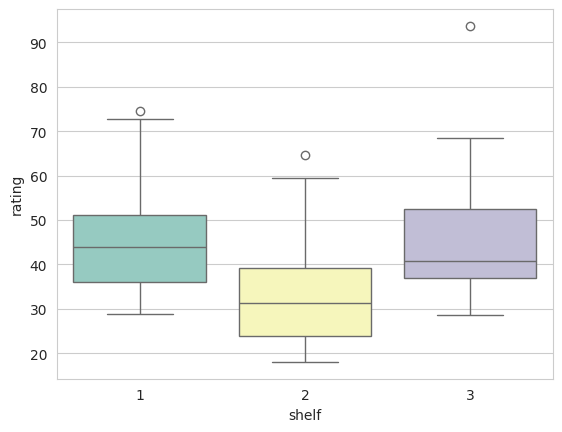

In [24]:
import seaborn as sns
sns.set_style("whitegrid")
#tips = sns.load_dataset("tips")
ax = sns.boxplot(x="shelf", y="rating",
data=cereals_df, palette="Set3")

# Correlation

## <u> Subquestions </u>

**a)** ***Correlation table:***

In [25]:
cols = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'weight', 'cups', 'rating']
cereals_df[cols].corr()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.257638,0.566533,-0.072063,0.265356,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.025012,-0.291853,0.563706,0.007335,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.300003,0.302497,0.200445,-0.031156,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.297687,0.058866,-0.042632,0.361477,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.380357,-0.138760,0.911528,-0.032243,0.247226,-0.513061,0.584160
carbo,0.257638,-0.025012,-0.300003,0.297687,-0.380357,1.000000,-0.471184,-0.365003,0.219202,0.138467,0.367460,0.088712
sugars,0.566533,-0.291853,0.302497,0.058866,-0.138760,-0.471184,1.000000,0.001414,0.098231,0.455844,-0.048961,-0.763902
potass,-0.072063,0.563706,0.200445,-0.042632,0.911528,-0.365003,0.001414,1.000000,-0.005427,0.419933,-0.501607,0.416009
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.219202,0.098231,-0.005427,1.000000,0.320324,0.128405,-0.240544
weight,0.696091,0.216158,0.214625,0.308576,0.247226,0.138467,0.455844,0.419933,0.320324,1.000000,-0.199583,-0.298124


**b.)** ***Discuss***

The pair of vairiables most strongly correlated are potassium and fiber  and they are positively correlated.

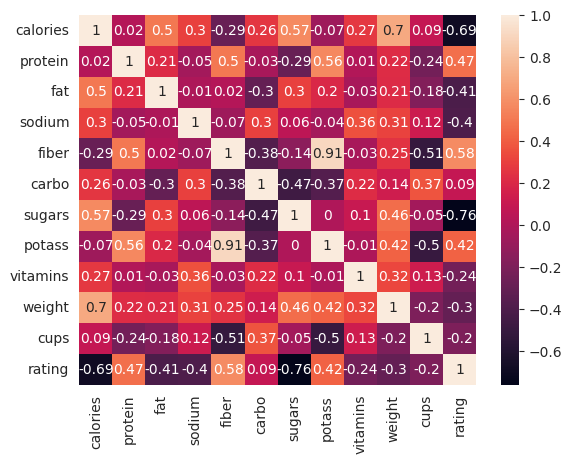

In [26]:
import matplotlib.pyplot as plt

matrix = cereals_df[cols].corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()